In [23]:
# Importing necessary libraries
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')  

## Exploratory Data Analysis

In [25]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [26]:
# Display summary statistics
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [27]:
# Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [28]:
# Checking the no.of rows and columns in the dataset
def ds_shape(df, ds_name='df'):
    print(f"The {ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} Columns")

ds_shape(df, ds_name='df')

The df dataset has 10000 rows and 14 Columns


## Data Preprocessing

In [29]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, ds_name='df')

Null Values in each col in the df dataset:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [30]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

## Data Visualization

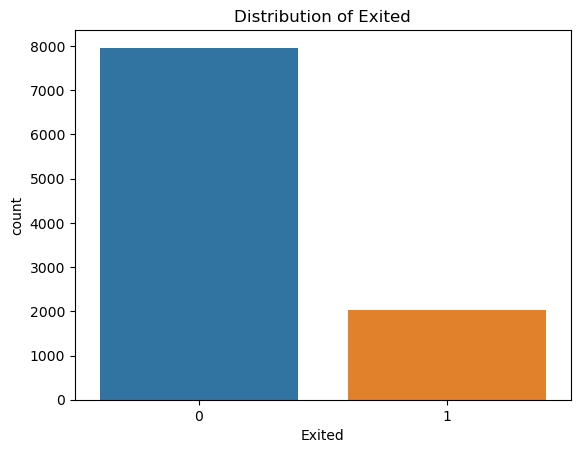

In [31]:
# Visualize the distribution of the target variable 'Exited'
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.show()

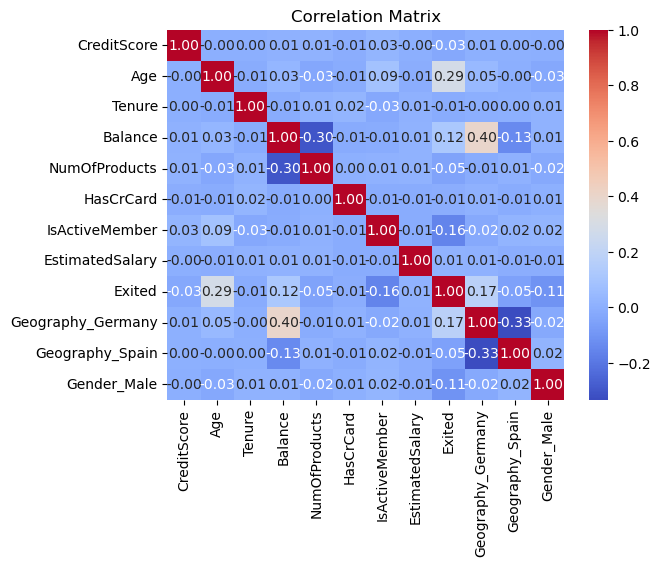

In [32]:
# Correlation analysis
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


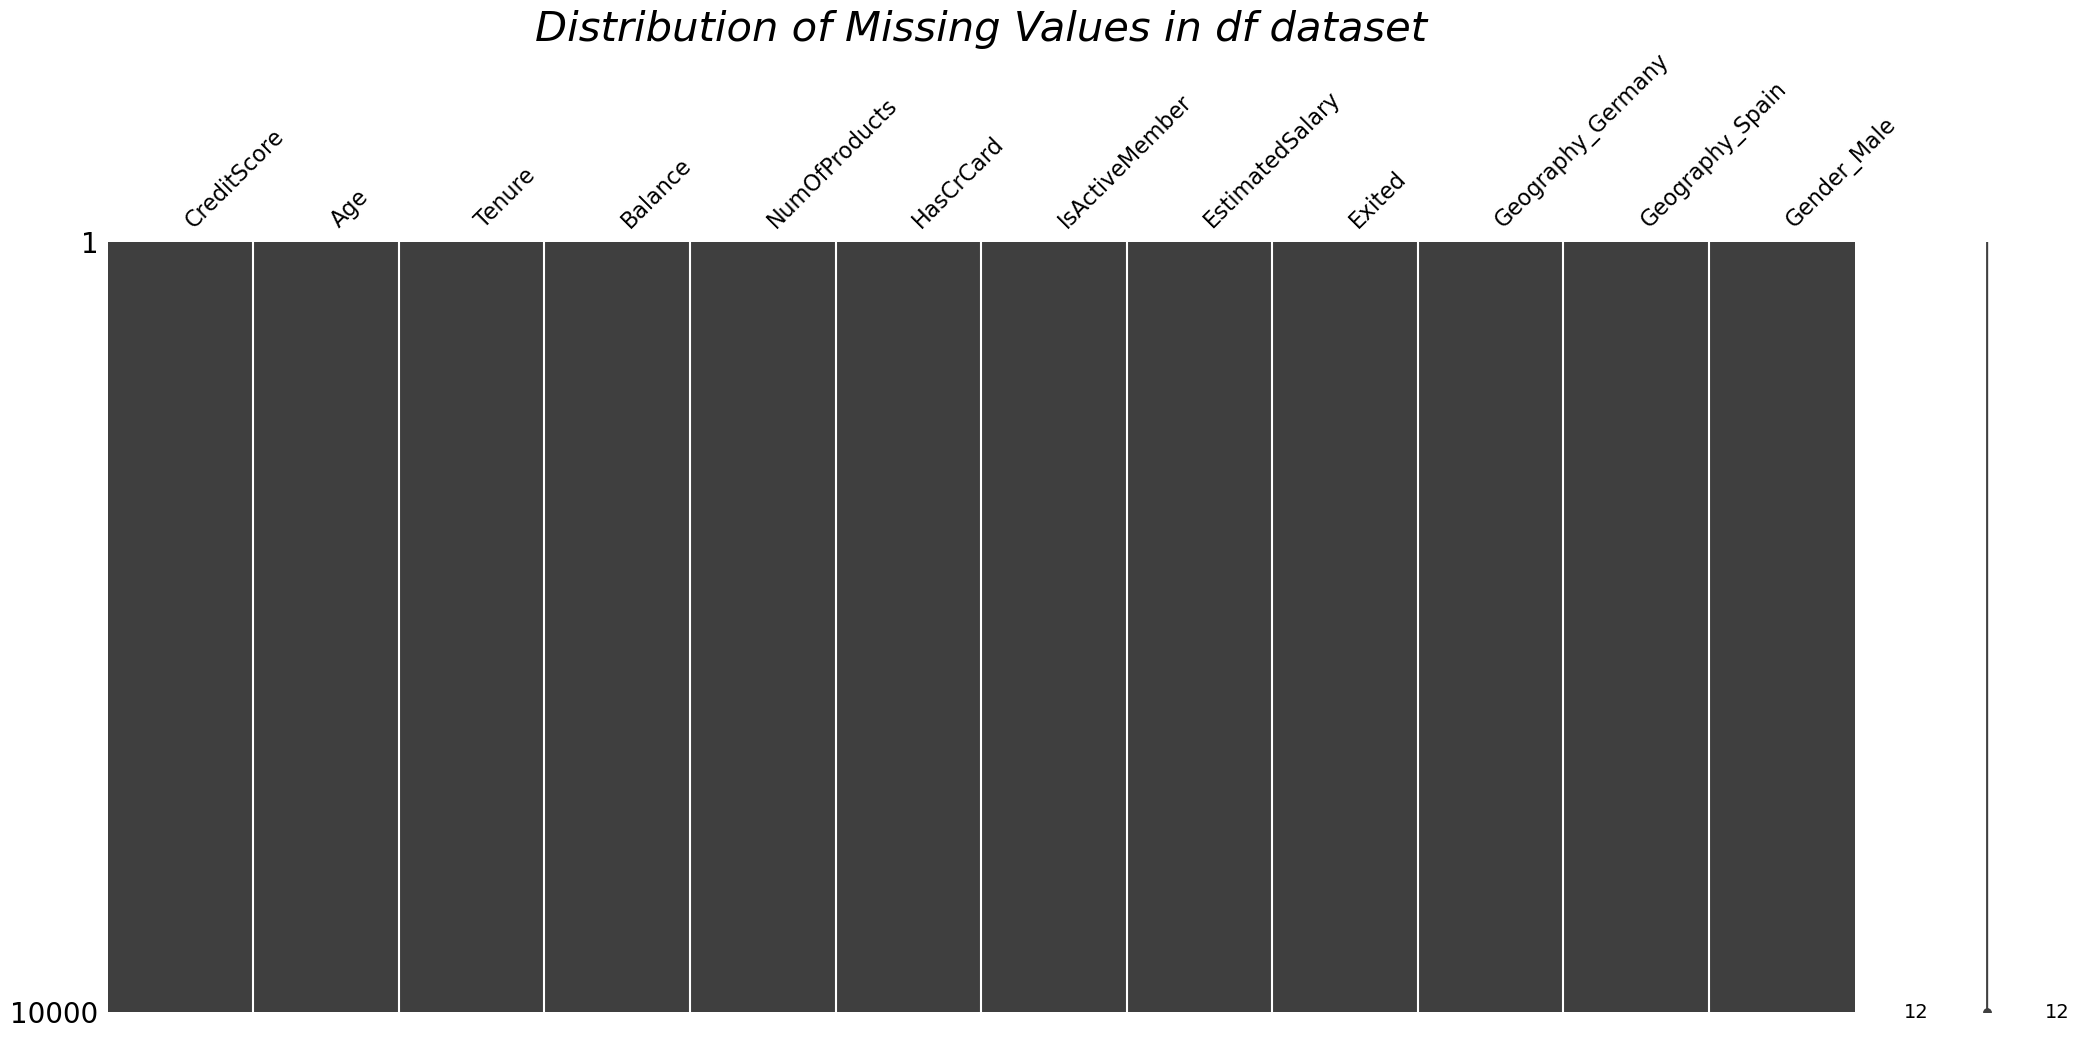

The number of unique values in each column in df dataset:

CreditScore           460
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Geography_Germany       2
Geography_Spain         2
Gender_Male             2
dtype: int64


In [33]:
# Function to plot the distribution of missing values in the dataset
def plot_miss_vals(df, ds_name="df"):
    # Use the missingno library to create a matrix plot of missing values
    msno.matrix(df)
    # Set the title of the plot with the dataset name
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    # Display the plot
    plt.show()

# Call the function to visualize missing values in the dataset
plot_miss_vals(df, ds_name='df')

# Function to display the number of unique values in each column of the dataset
def uni_vals(df, ds_name='df'):
    # Print a message indicating the purpose of the output
    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    # Display the number of unique values for each column
    print(df.nunique())

# Call the function to display unique values in each column of the dataset
uni_vals(df, ds_name='df')


Categorical Features are: ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

Continuous Features are: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


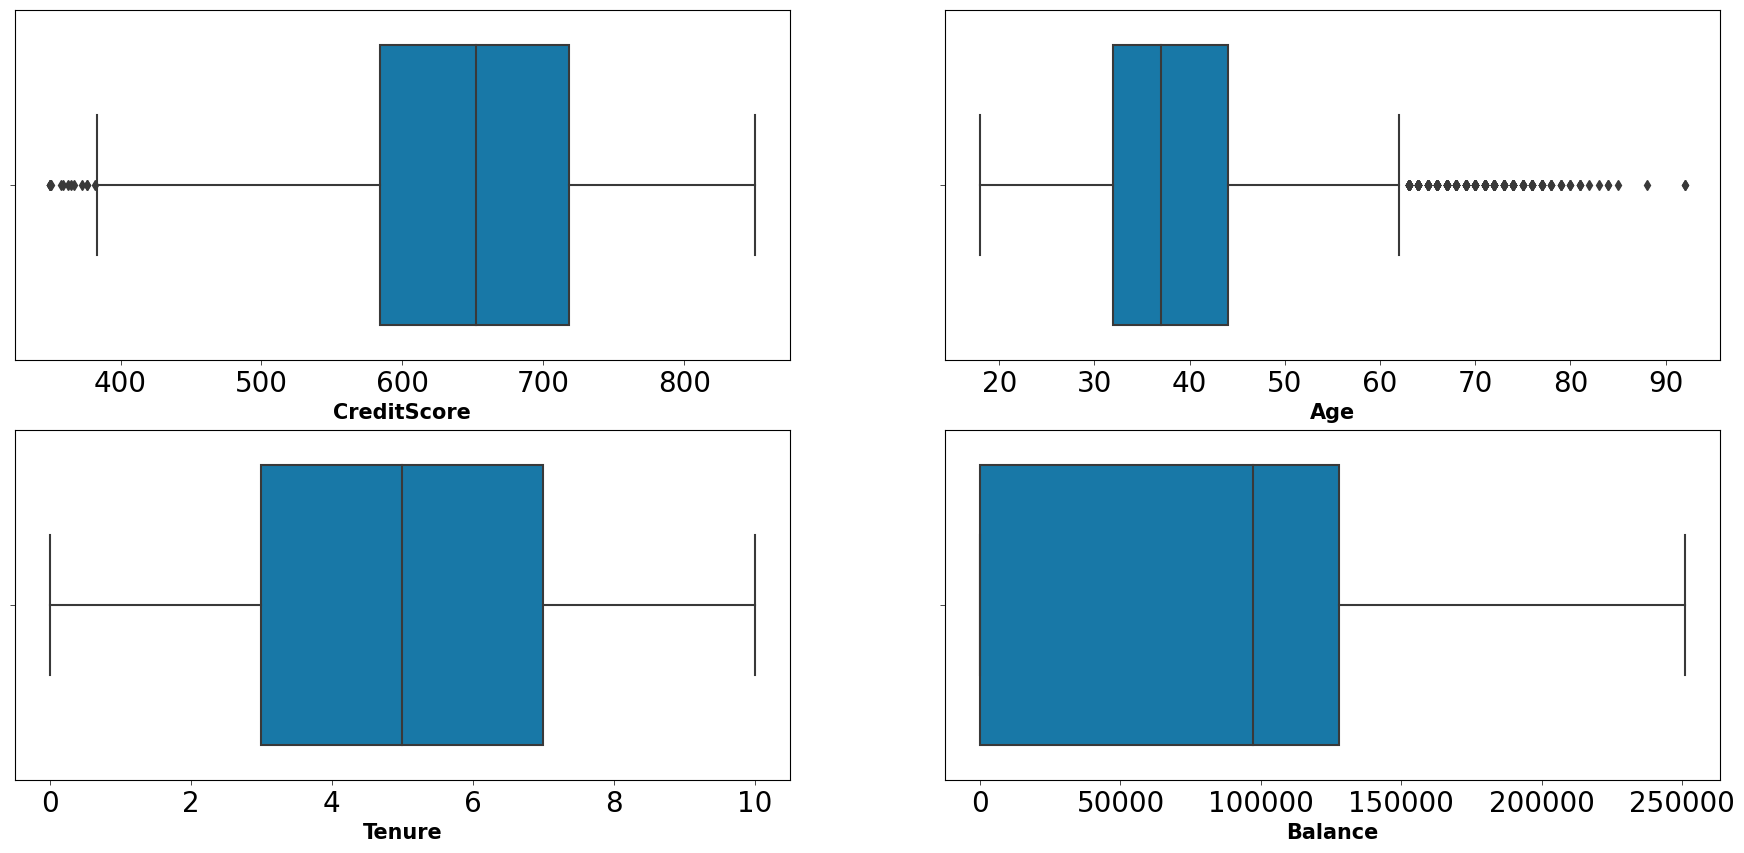

In [34]:
# Lists to store categorical and continuous features
cat_features = []
cont_features = []

# Loop through the unique values in each column to categorize features
for i in range(len(df.nunique())):
    # If the number of unique values is less than or equal to 25, consider it a categorical feature
    if df.nunique().values[i] <= 25:
        cat_features.append(df.nunique().index[i])
    # Otherwise, consider it a continuous feature
    else:
        cont_features.append(df.nunique().index[i])

# Print the lists of categorical and continuous features
print(f"Categorical Features are: {cat_features}\n")
print(f"Continuous Features are: {cont_features}")

# Set the number of columns and rows for subplots
ncols = 2
nrows = 2

# Create subplots with a specified size
fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10))

# Filter numeric columns for boxplot visualization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through the subplots
for r in range(nrows):
    for c in range(ncols):
        # Select the column for the current subplot
        col = numeric_cols[r * ncols + c]
        # Create a boxplot for the selected column
        sns.boxplot(x=col, data=df, ax=axes[r, c], palette='winter')
        # Customize the appearance of the subplot
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)

# Display the subplots
plt.show()

## Model Training and Evaluation

In [35]:
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = \
    scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [36]:
# Split the data into features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

In [37]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


# Logistic Regression
print("Logistic Regression:")
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", accuracy_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.8115
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1544   63]
 [ 314   79]]


## Random Forest Model

In [39]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Random Forest
print("\nRandom Forest:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.865
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix:
 [[1543   64]
 [ 206  187]]


## Gradient Boosting Model 

In [40]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# XGBoost
print("\nXGBoost:")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost:
Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Confusion Matrix:
 [[1526   81]
 [ 191  202]]


## Comparing Models and their Accuracies

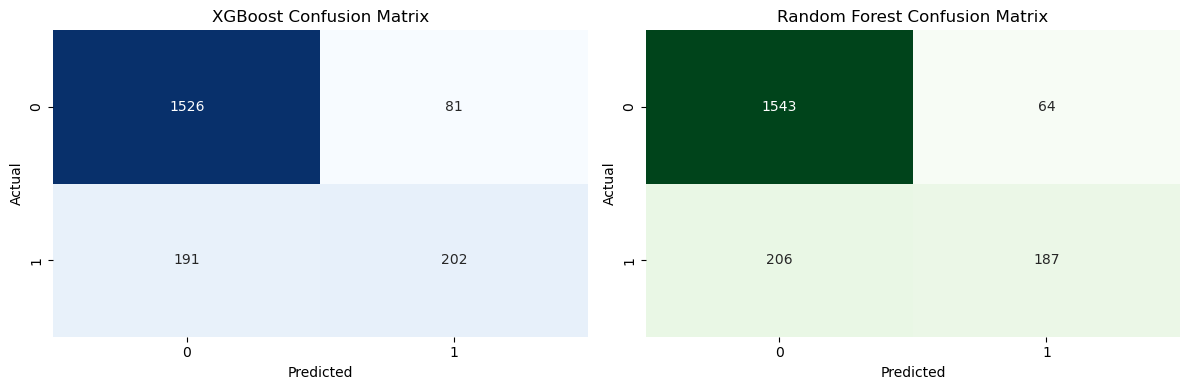

In [41]:
# Calculate confusion matrices for XGBoost and Random Forest models
xgboost_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
randomForest_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Set up a figure with two subplots side by side
plt.figure(figsize=(12, 4))

# Plot the first confusion matrix for XGBoost on the left subplot
plt.subplot(1, 2, 1)
# Create a heatmap with annotations, using the 'Blues' color map
sns.heatmap(xgboost_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
# Set the title, x-axis label, and y-axis label
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot the second confusion matrix for Random Forest on the right subplot
plt.subplot(1, 2, 2)
# Create a heatmap with annotations, using the 'Greens' color map
sns.heatmap(randomForest_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
# Set the title, x-axis label, and y-axis label
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


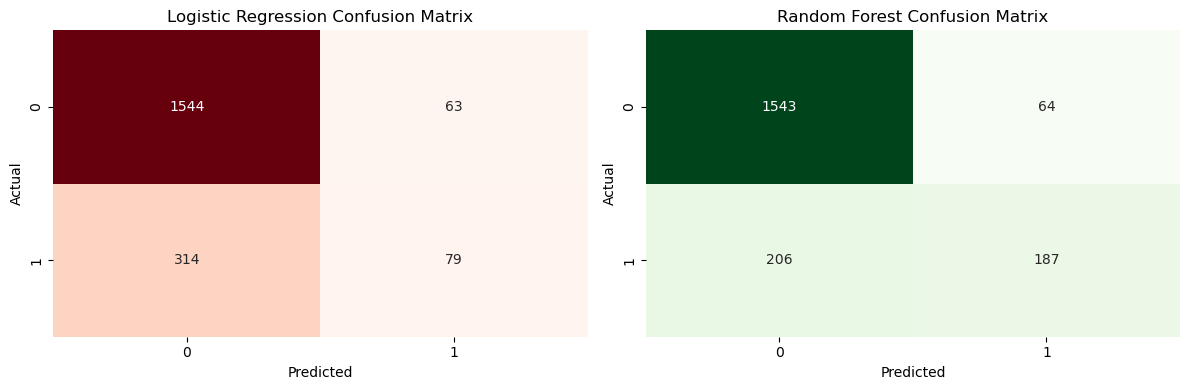

In [42]:
# Calculate confusion matrices for Logistic Regression and Random Forest models
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
randomForest_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Set up a figure with two subplots side by side
plt.figure(figsize=(12, 4))

# Plot the first confusion matrix for Logistic Regression on the left subplot
plt.subplot(1, 2, 1)
# Create a heatmap with annotations, using the 'Reds' color map
sns.heatmap(logreg_conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
# Set the title, x-axis label, and y-axis label
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot the second confusion matrix for Random Forest on the right subplot
plt.subplot(1, 2, 2)
# Create a heatmap with annotations, using the 'Greens' color map
sns.heatmap(randomForest_conf_matrix, annot=True, cmap='Greens', fmt='d', cbar=False)
# Set the title, x-axis label, and y-axis label
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


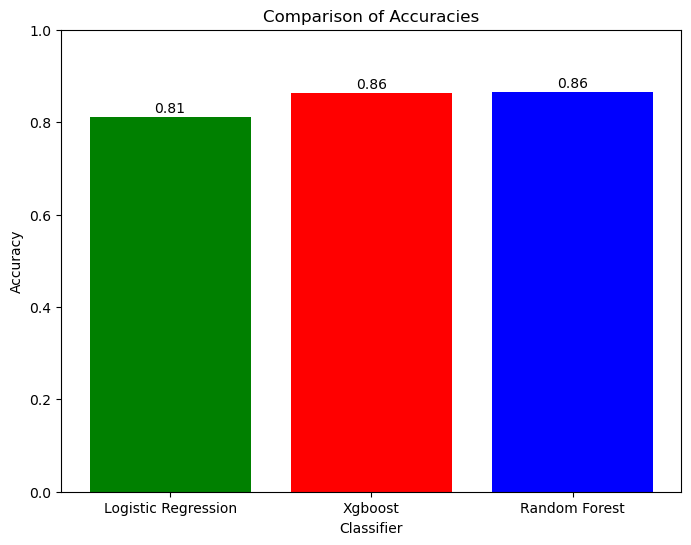

In [43]:
# Comparing accuracies
classifiers = ['Logistic Regression', 'Xgboost', 'Random Forest']
accuracies = [accuracy_logreg, accuracy_xgb, accuracy_rf]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['green', 'red', 'blue'])
plt.title('Comparison of Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()


## Prediction of Result

In [38]:
# In the prediction function, replace 'xgb' with the appropriate classifier (e.g., 'rf' or 'logreg')
# Function to predict whether a customer is likely to stay or exit the bank
def prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols):
    # Initialize variables for geographical and gender indicators
    geo_spain = 0
    geo_germany = 0
    gender_male = 0
    
    # Check the geographical location and update indicators
    if geo == 'Germany':
        geo_germany = 1
    elif geo == 'Spain':
        geo_spain = 1
        
    # Check the gender and update the indicator
    if gender == 'Male':
        gender_male = 1
    
    # Create a new DataFrame for the input data
    data_points = pd.DataFrame(columns=cols)
    vals = [cs, age, tenure, balance, num_of_products, has_card, am, es, geo_germany, geo_spain, gender_male]
    # Add the input values to the DataFrame
    data_points.loc[len(data_points.index)] = vals
    
    # Create a StandardScaler to scale the features
    scaler = StandardScaler()
    # Get the list of feature columns
    features = list(X_train.columns)

    # Scale each feature in the input data
    for col in features:
        data_points[col] = scaler.fit_transform(data_points[col].to_numpy().reshape(-1, 1))
        
    # Make a prediction using the chosen classifier (XGBoost in this case)
    predict = xgb.predict(data_points)[0]  # Replace 'xgb' with the chosen classifier
    
    # Provide a prediction result based on the model output
    if predict == 0:
        print("This Customer is more likely to Stay.")
    else:
        print("This Customer is more likely to exit the bank.")


## Example Prediction

In [44]:
#Example:

cs = 815
age = 39
tenure = 6
balance = 0
num_of_products= 1
has_card = 1
am = 1 
es = 85167.88
geo = 'Spain'
gender = 'Female'
cols = X_train.columns
prediction_fun(cs, age, tenure, balance, num_of_products, has_card, am, es, geo, gender, cols)

This Customer is more likely to Stay.
